# Introduction

As a beginner, I have pretty good knowledge into data analysis. Rather than looking for more videos and sessions, I thought to implement on something. So that, along the road I can step by step explore the areas as encountered. So first, I picked up a dataset and then see what I can do with it.

# Source

<a href='https://www.kaggle.com/mehdidag/black-friday/downloads/black-friday.zip/1'>Kaggle</a> is a very good place to find numerous datasets. I browsed some data sets and picked the Black Friday dataset.

# Preparation

In [1]:
#The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception).
import warnings
warnings.filterwarnings('ignore')

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
#Reading the Data
data = pd.read_csv('BlackFriday.csv')

In [3]:
#prints information about the DataFrame including the index dtype and column dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


There are 12 different columns with different datatypes ( eg.int64, object, float64 ). The datatypes of Product_Category_1 is an integer and other two category have float datatypes. We can change the datatypes into integer. First, take a look at the dataFrame.

In [4]:
# Look at the DataFrame
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Looks like we have some duplicate User_ID and have some null/NaN values in the product categories. We would try to plot a few columns. But, before that, We need to clean the null values and convert the data types of category column into the integer.

In [5]:
# Check which column has null/NaN values
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

Here, only Product_Category_2 and Product_Category_3 have null values. We can fill this null values with 0.

In [6]:
# fill null values with 0.
data.fillna(value=0,inplace=True)

#conver data types into integer
data['Product_Category_2'] = data['Product_Category_2'].astype('int64')
data['Product_Category_3'] = data['Product_Category_3'].astype('int64')

# Exploratory Data Analysis
Let's start plotting some columns

## 1.Gender
Above we saw some duplicate user Id. We need to remove those first to present the actual gender distribution.Analyzing data for-
> 1. Who is more likely to spend more in a black Friday sale?
>          Male or Female.

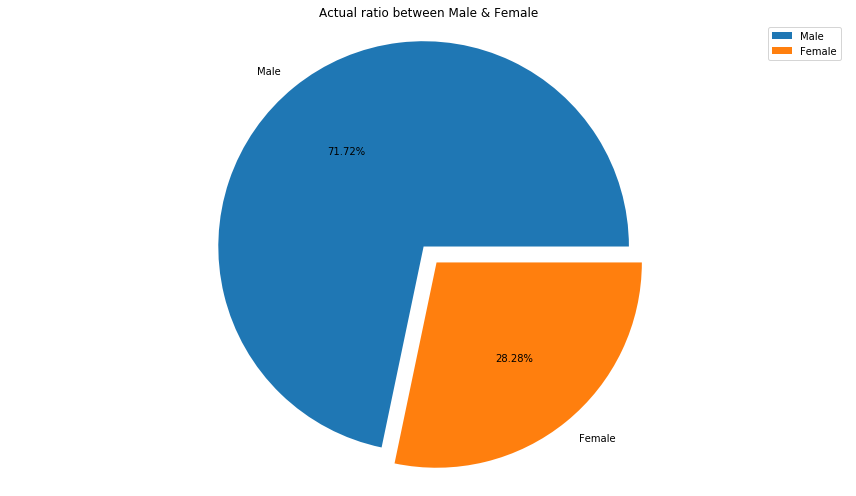

In [7]:
actualGender = data[['User_ID','Gender']].drop_duplicates('User_ID')
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(actualGender['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%',explode = (0.1,0))
plt.title("Actual ratio between Male & Female")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

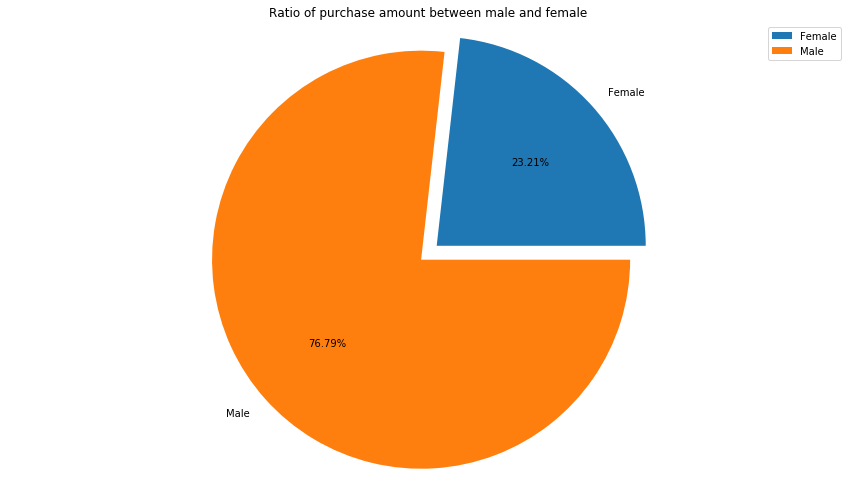

          Purchase
Gender            
F       1164624021
M       3853044357


In [8]:
# Let's check the ratio of purchase amount between male and female with duplicates User_id

fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data[['Gender','Purchase']].groupby(by='Gender').sum(),labels=['Female','Male'],autopct='%1.2f%%',explode = (0.1,0))
plt.title("Ratio of purchase amount between male and female")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

print(data[['Gender','Purchase']].groupby(by='Gender').sum())

> In the Black Friday, About 72% of the customers were male. Male of all ages purchase different products which worth more than 4 billion dollars. It looks like very less number of females attended the black friday sale. But it could also mean less number of females paid for the products and may be their spouse paid for them.

## 2.Age & Marital Status
Above we saw some duplicate user Id. We need to remove those first to present the actual Age distribution.Analyzing data for-
>         Which age group is more likely to spend more in a black Friday sale?

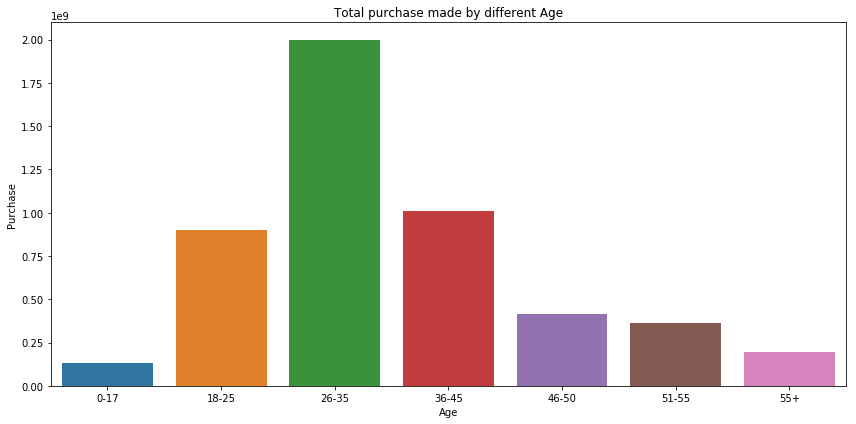

In [9]:
AgePurchase_DF = data[['Age','Purchase']].groupby('Age').sum().reset_index()
fig1,ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x='Age',y='Purchase',data=AgePurchase_DF)
plt.title('Total purchase made by different Age')
plt.tight_layout()

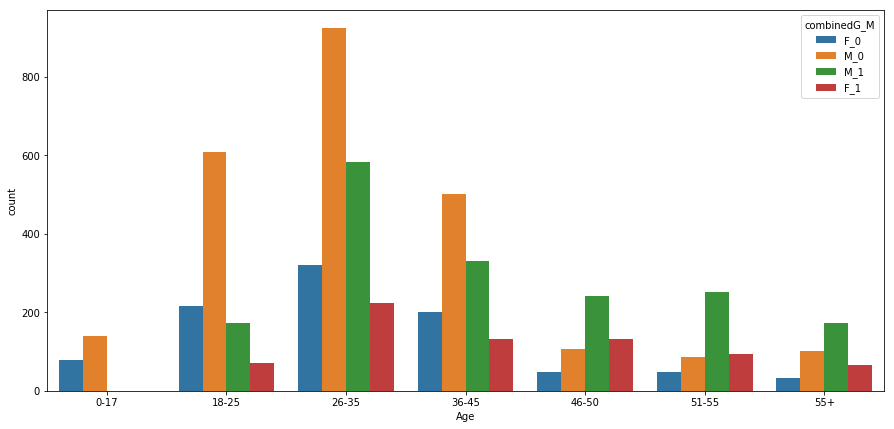

In [10]:
AgeGenderMeritual_DF = data[['User_ID','Age','Gender','Marital_Status']].drop_duplicates()
AgeGenderMeritual_DF.sort_values(by='Age',inplace=True)
AgeGenderMeritual_DF['combinedG_M'] = AgeGenderMeritual_DF.apply(lambda x: '%s_%s' % (x['Gender'],x['Marital_Status']), axis=1)
fig1,ax1 = plt.subplots(figsize=(15,7))
sns.countplot(x= 'Age',hue='combinedG_M',data=AgeGenderMeritual_DF)

> In the Black Friday, most customers aged from 26 to 35 years. The store has achieved sales of about 4 billion in the age group of 26-45 years. It looks like a very large number of unmarried men aged from 18 to 45 years attended at the black Friday sale. But it could also mean less number of women paid for the products and maybe their spouse paid for them. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes/gift items we cannot further explore this case.

## 3.Occupation
Above we saw some duplicate user Id. We need to remove those first to present the actual Occupation based distribution.Analyzing data for-
> Which Occupation group is more likely to spend more in a black Friday sale?

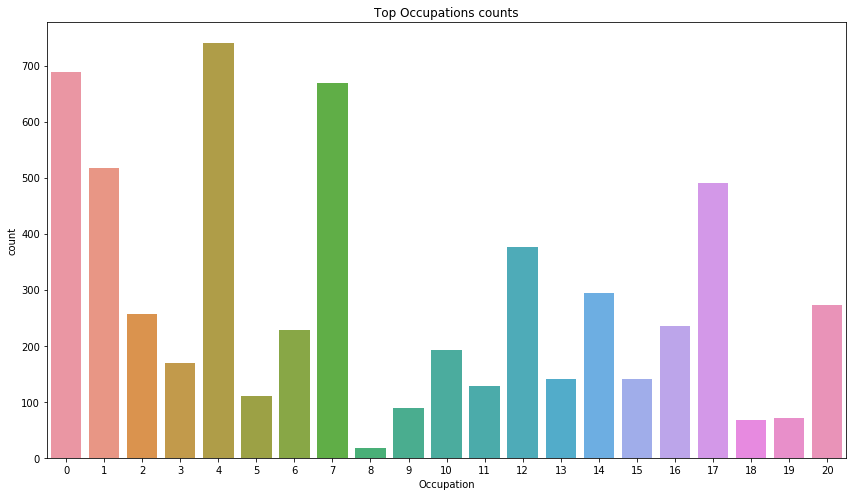

In [11]:
Occupation_DF = data[['User_ID','Occupation','Purchase']].drop_duplicates('User_ID')
Occupation_DF = Occupation_DF.drop('User_ID',1)
fig1, ax1 = plt.subplots(figsize = (12,7))
sns.countplot(x='Occupation',data=Occupation_DF)
plt.title('Top Occupations counts')
plt.tight_layout()

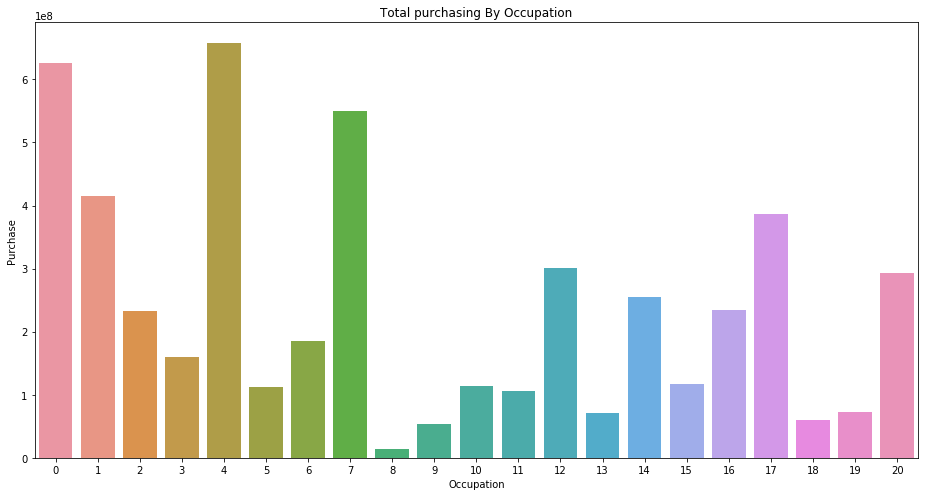

In [12]:
Occupation_DF1 = data[['Occupation','Purchase']].groupby('Occupation').sum().reset_index()
fig1,ax1=plt.subplots(figsize=(13,7))
sns.barplot(x='Occupation',y='Purchase',data=Occupation_DF1)
plt.title('Total purchasing By Occupation')
plt.tight_layout()

> Purchasing power is closely related to the Occupation.

## 4.City Category & Stay In Current City Years
> *  Which city made large revenue in a black Friday sale?
> * Who bought most of the product

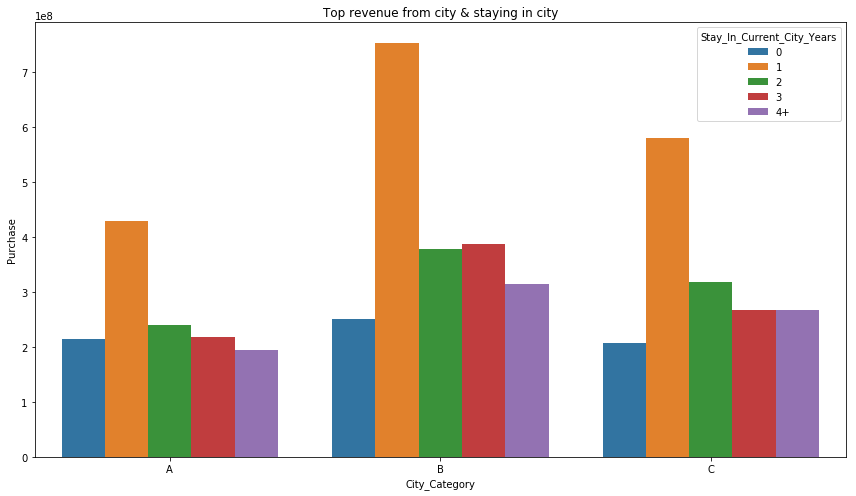

In [13]:
city_DF = data[['City_Category','Stay_In_Current_City_Years','Purchase']].groupby(['City_Category','Stay_In_Current_City_Years']).sum().reset_index()
fig1,ax1 = plt.subplots(figsize = (12,7))
sns.barplot(x='City_Category',y='Purchase',hue= 'Stay_In_Current_City_Years',data = city_DF)
plt.title("Top revenue from city & staying in city")
plt.tight_layout()

> In the Black Friday, New city residents and Visitors gave maximum revenue and city B sold more products than city-A and city-B. Though both City-A and city-B also sold good amount.

## 5.Product & Categories
> Top selling Products?

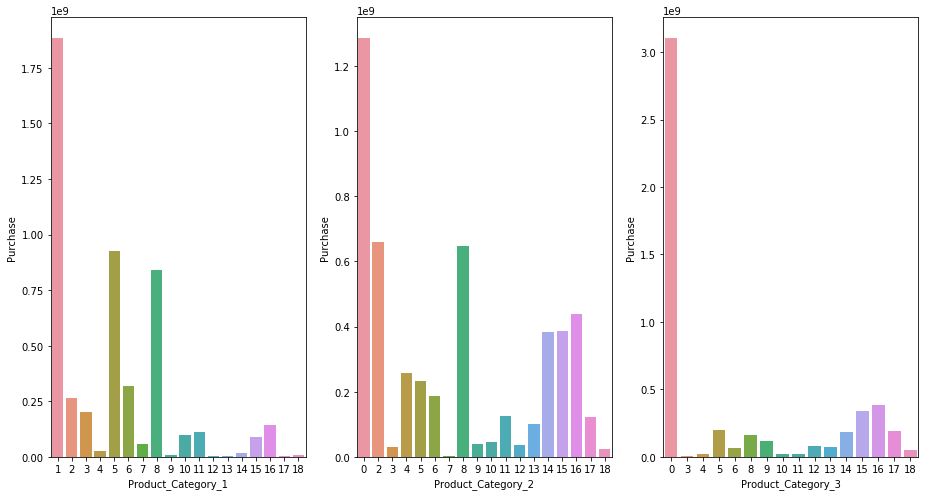

In [14]:
category1_DF = data[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum().reset_index()
category2_DF = data[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum().reset_index()
category3_DF = data[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum().reset_index()

fig , (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,7))

sns.barplot(x='Product_Category_1',y='Purchase',data=category1_DF,ax=ax1)
sns.barplot(x='Product_Category_2',y='Purchase',data=category2_DF,ax=ax2)
sns.barplot(x='Product_Category_3',y='Purchase',data=category3_DF,ax=ax3)

plt.tight_layout()

> In the avobe plot, We get the product category of top selling products.

## Conclusion
On the Black Friday sale, different types of customers from different cities come to visit and purchase products. 19-45 years old unmaried male customers from city B purchase more than other group of customers.

> ## Thank you!! If you have any suggestion ,please put it on comments. 